In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [2]:
data = pd.read_csv("glass.csv")


In [3]:
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())


Dataset Head:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage

# Exploratory Data Analysis (EDA):

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


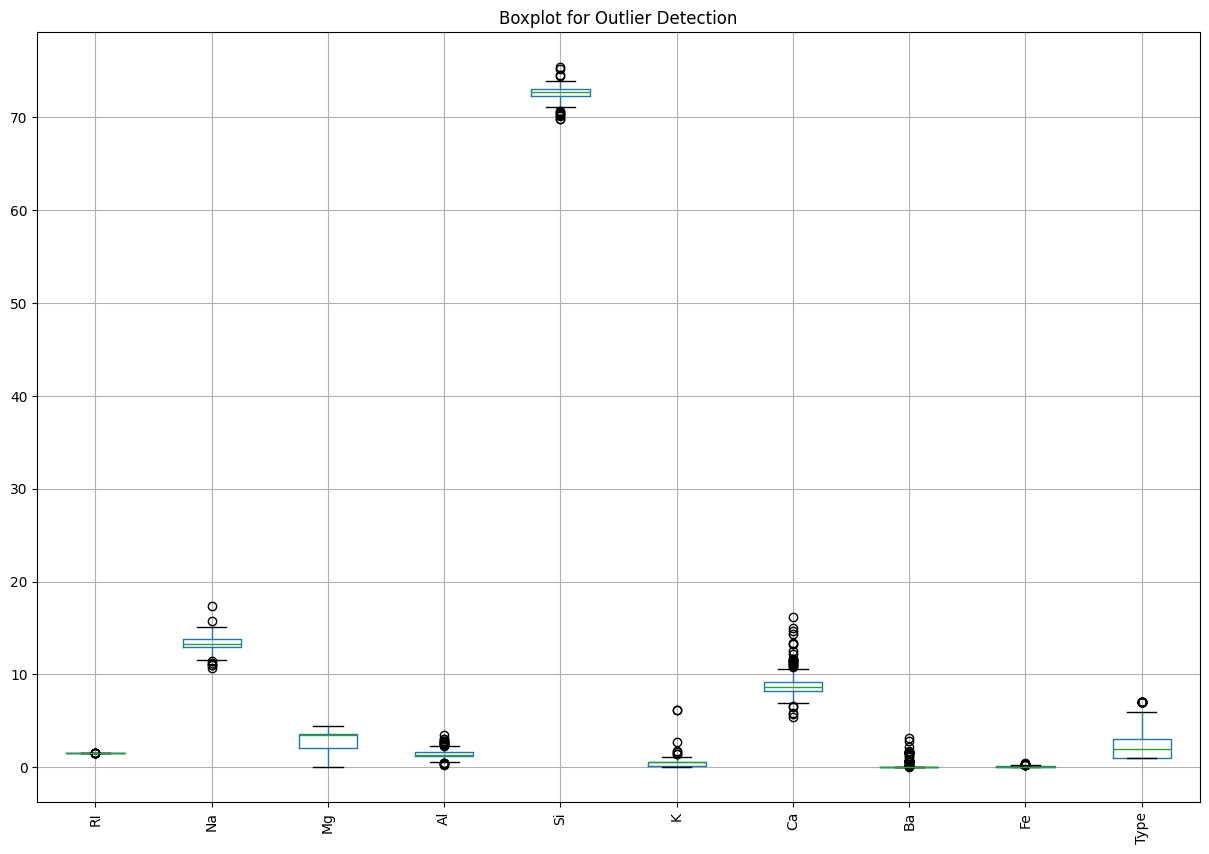

In [ ]:
# Check for outliers using box plots
plt.figure(figsize=(15,10))
data.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


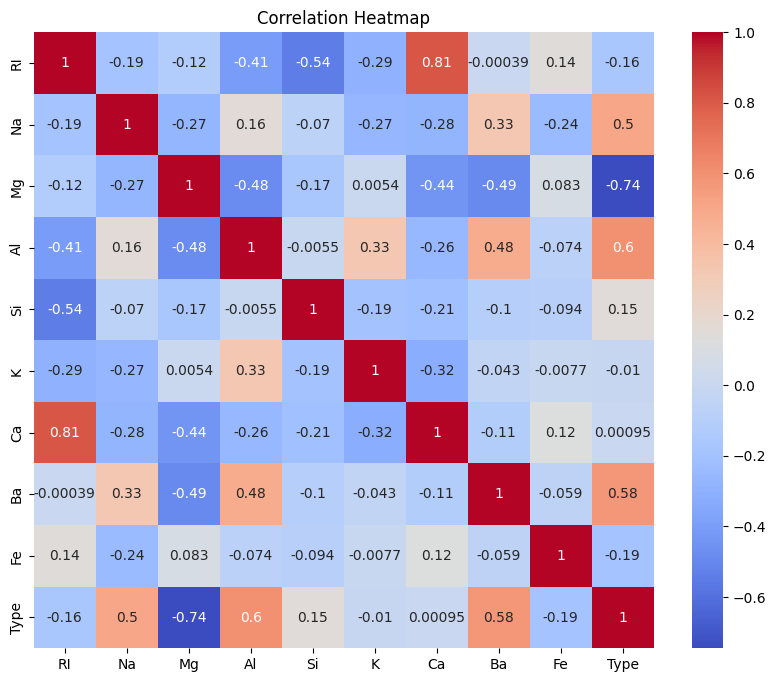

In [ ]:
# Check for correlations
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


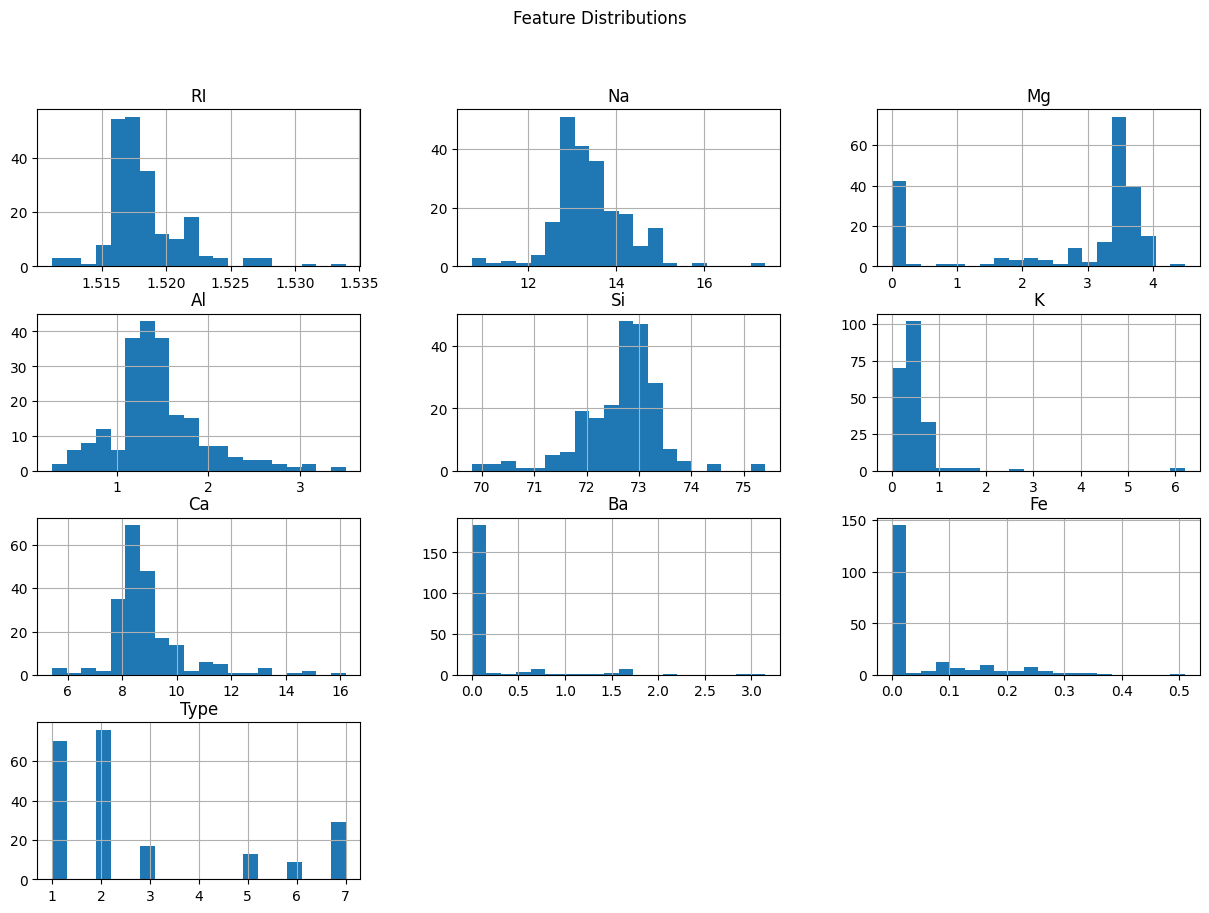

In [ ]:
# 2. Data Visualization
# Histograms
data.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


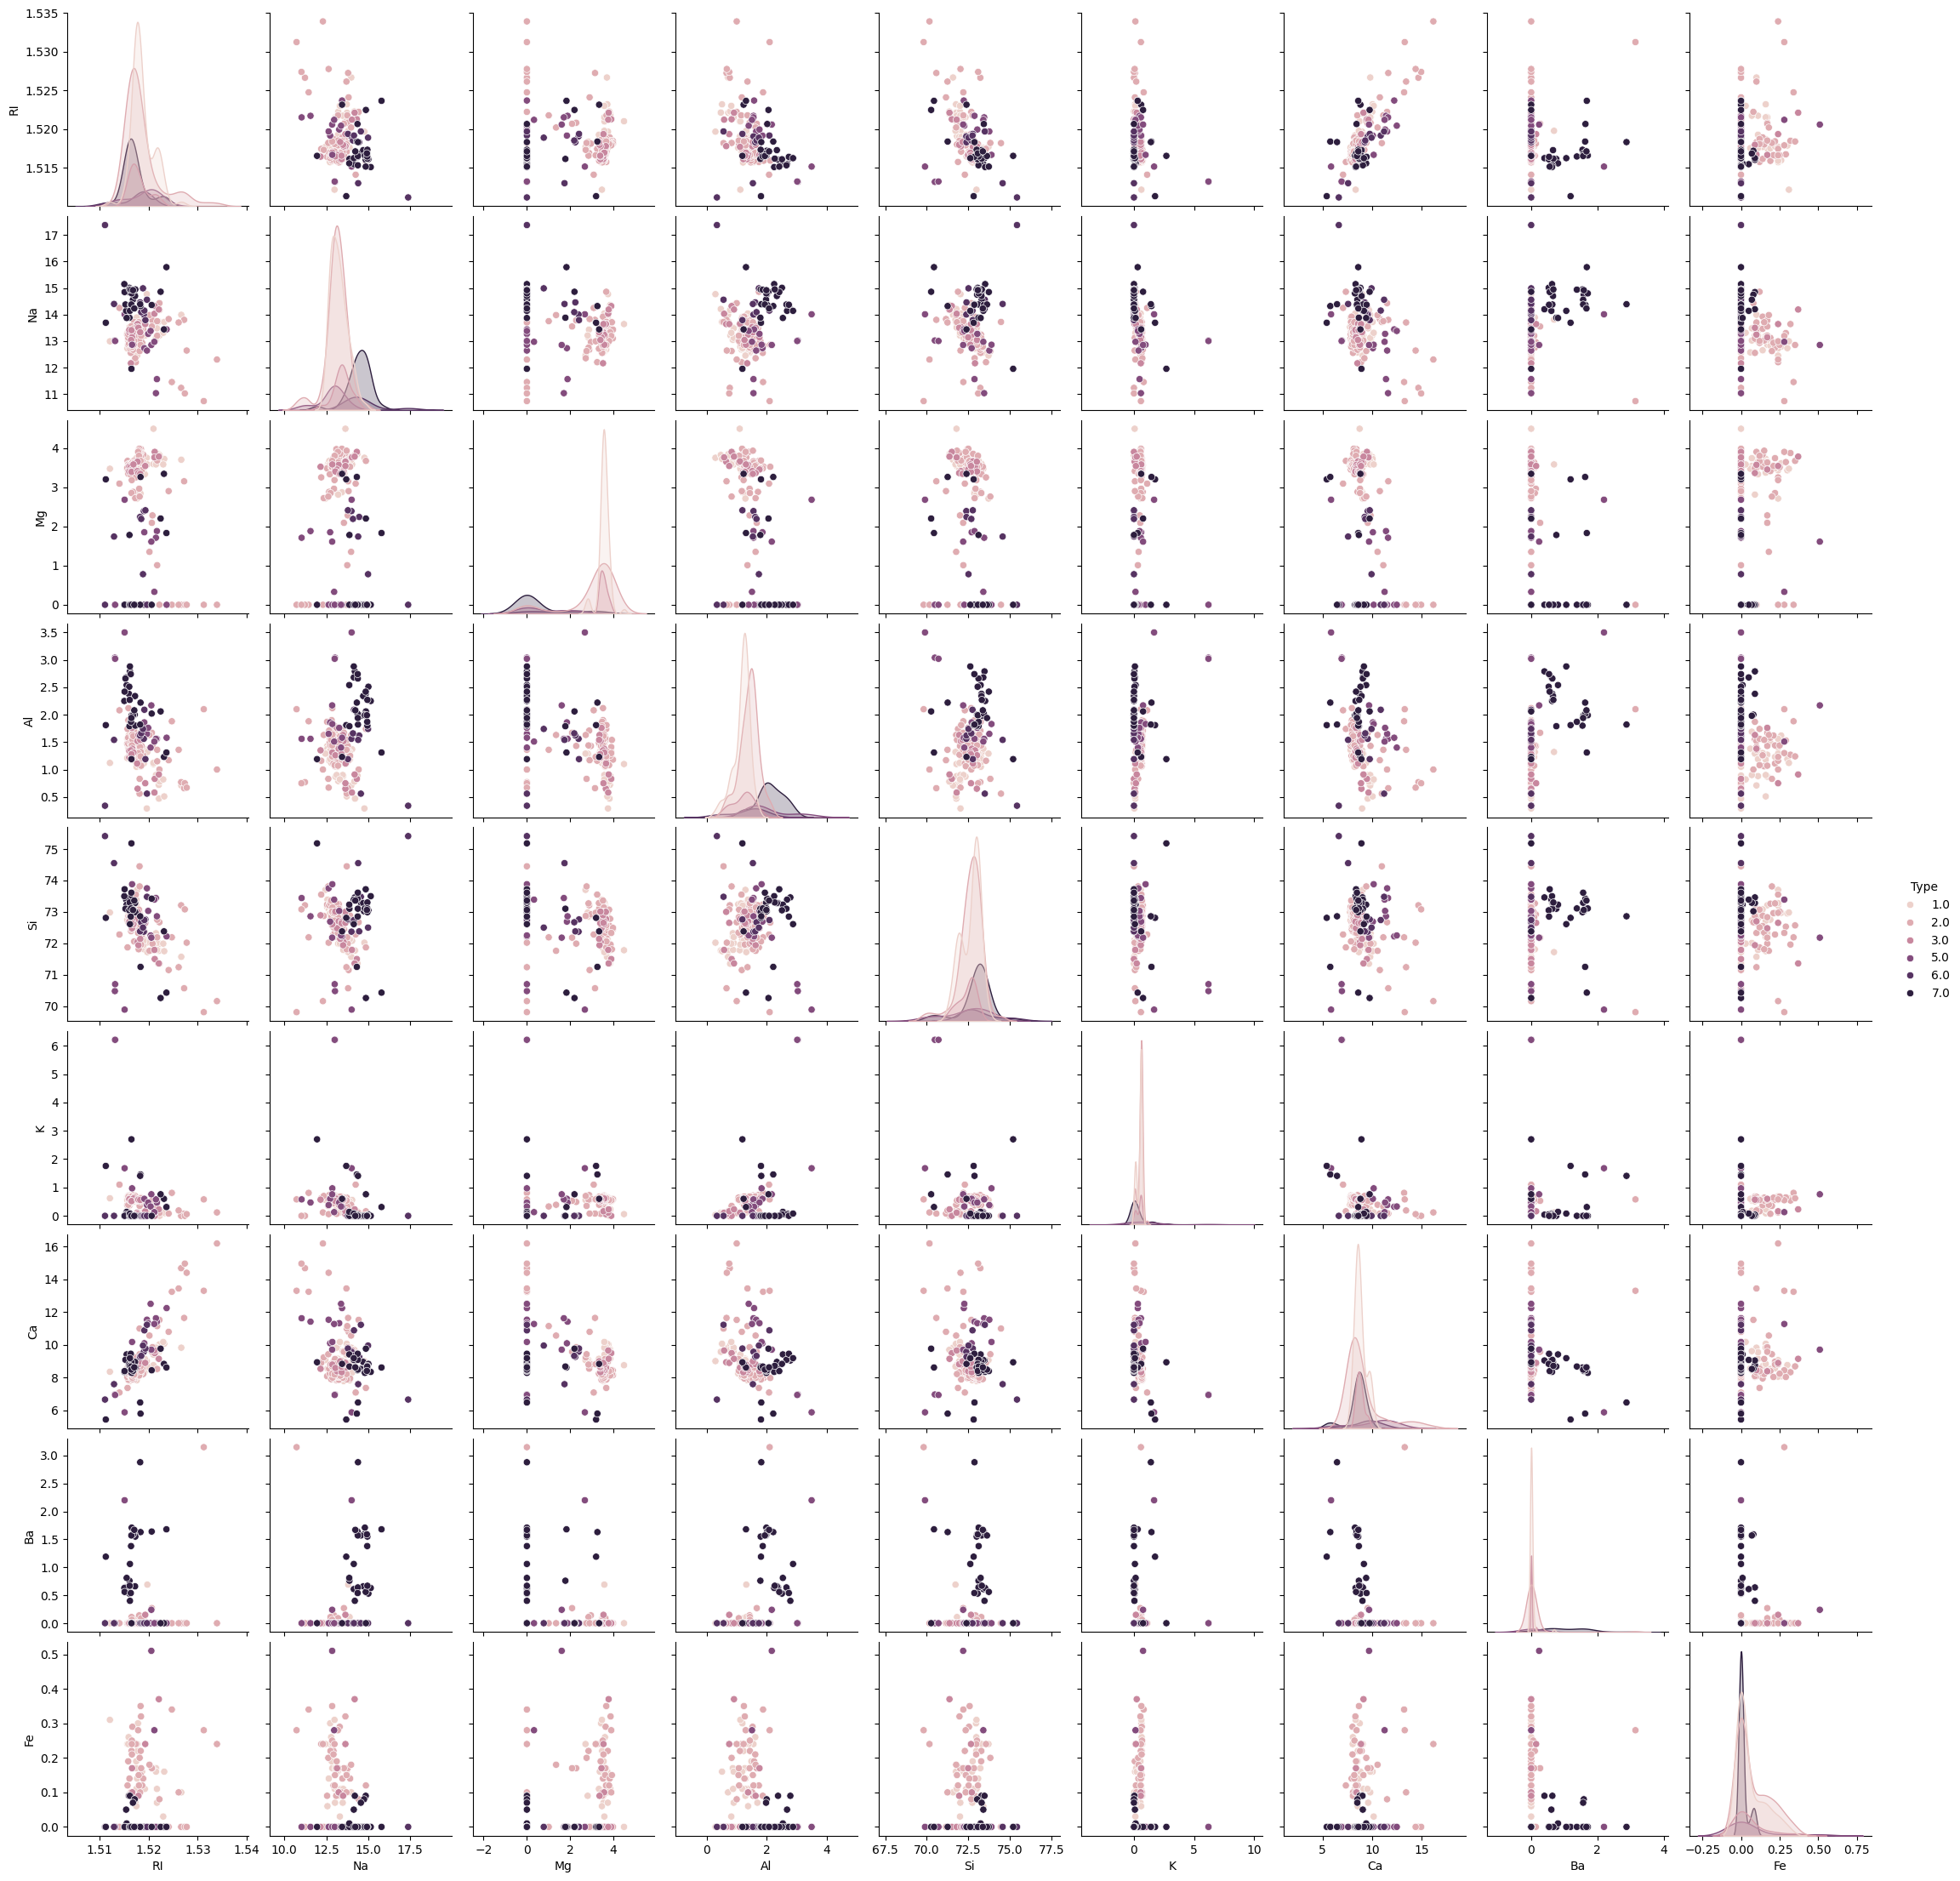

In [8]:
# Pair plot for visualizing feature relationships
sns.pairplot(data, hue='Type')  # Assuming 'Type' is the target variable
plt.show()


In [ ]:
# 3. Data Preprocessing
# Handling missing values (if any)
# In this example, we drop rows with missing values
data.dropna(inplace=True)


In [ ]:

# Encode categorical variables (if any, otherwise skip)
# Assuming 'Type' is the only categorical target variable, no encoding needed for numeric features

# Scale features
scaler = StandardScaler()
X = data.drop(columns='Type')  # Assuming 'Type' is the target
y = data['Type']
X_scaled = scaler.fit_transform(X)


In [ ]:
# Handle class imbalance if needed (using resampling for demonstration)
# Here, we upsample minority classes in the training data
X_resampled, y_resampled = resample(X_scaled, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [13]:

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# df['Type'].replace([1,2,3,4,5,6,7],['Type1','Type2','Type3','Type4','Type5','Type6',"Type7"], inplace=True)
# Evaluate model performance
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Random Forest Model Performance:
Accuracy: 0.9069767441860465
Precision: 0.9158361018826134
Recall: 0.9069767441860465
F1 Score: 0.9000665570433012

Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      1.00      0.96        13
         2.0       0.86      0.92      0.89        13
         3.0       1.00      1.00      1.00         5
         5.0       1.00      0.50      0.67         2
         6.0       1.00      0.60      0.75         5
         7.0       0.83      1.00      0.91         5

    accuracy                           0.91        43
   macro avg       0.94      0.84      0.86        43
weighted avg       0.92      0.91      0.90        43



In [ ]:
# 5. Bagging and Boosting Methods
# Bagging with BaggingClassifier
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bagging_model.fit(X_train, y_train)
y_bagging_pred = bagging_model.predict(X_test)
print("\nBagging Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_bagging_pred))



Bagging Model Performance:
Accuracy: 0.8372093023255814


In [ ]:
# Boosting with AdaBoostClassifier
boosting_model = AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42)
boosting_model.fit(X_train, y_train)
y_boosting_pred = boosting_model.predict(X_test)
print("\nBoosting Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_boosting_pred))



Boosting Model Performance:
Accuracy: 0.8604651162790697


C:\Users\Yogesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [17]:
# Explanation of Bagging and Boosting
print("""
Bagging (Bootstrap Aggregating) and Boosting are both ensemble methods. 
- Bagging involves training multiple models independently and combining their predictions to reduce variance.
- Boosting sequentially trains models, each focusing more on the errors of the previous model to reduce bias.
""")




Bagging (Bootstrap Aggregating) and Boosting are both ensemble methods. 
- Bagging involves training multiple models independently and combining their predictions to reduce variance.
- Boosting sequentially trains models, each focusing more on the errors of the previous model to reduce bias.

